(1599, 1536) (1616, 6)
1599
(1599, 1536) (1599, 6)


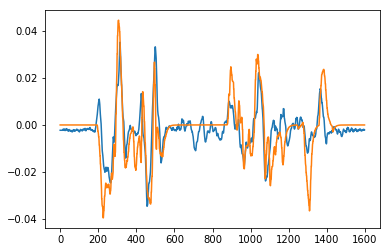

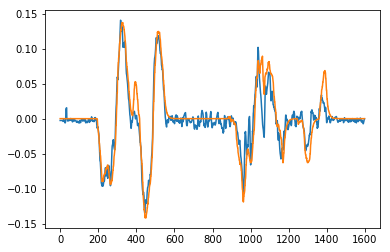

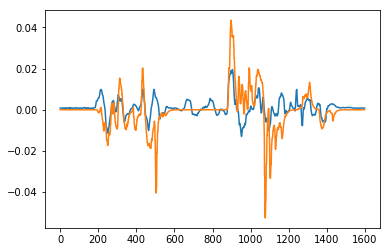

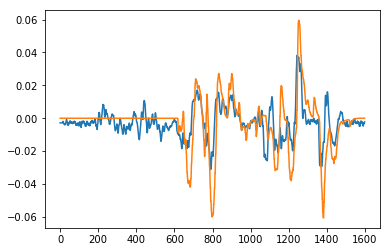

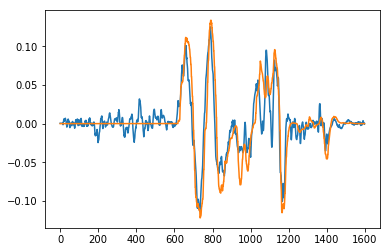

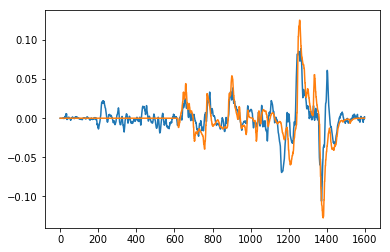

In [33]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

data = np.load('data2_grid.npz')
vel = data['vel']
pos = data['pos']
feat = data['feat']


y = vel[:,:-3]-vel[:,3:]#-pos[:,4]
y = vel[:]
from scipy.ndimage.filters import uniform_filter1d
X = uniform_filter1d(feat,5,axis=0)

X = np.vstack((np.zeros((15,X.shape[1])), X[30:] - X[:-30]))
#X = feat
print X.shape, y.shape
X,y = same_size(X,y)
# X = X[100:-100]
# y = y[100:-100]
print X.shape, y.shape

# begin training
from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(max_depth=2)

from sklearn import linear_model
model = linear_model.Lasso(alpha = 0.1)
#model = linear_model.LogisticRegression()

inds = sorted(np.random.choice(1500, 200, replace=False))
X_train = X[inds]
y_train = y[inds]
model.fit(X_train, y_train)
y_pred = model.predict(X)

#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

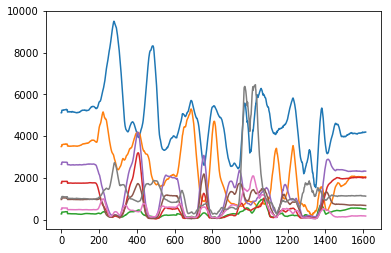

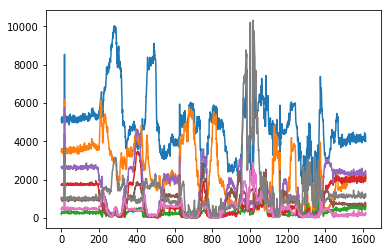

In [13]:
feat
X = feat
X = uniform_filter1d(X,30,axis=0)
plt.plot(range(len(X)),X)
plt.show()
plt.plot(range(len(feat)),feat)
plt.show()